# Heart disease

## Objective

Training a model for the diagnosis of coronary artery disease (binary classification).

## Context

The dataset is provided by the Cleveland Clinic Foundation for Heart Disease ([more information](https://archive.ics.uci.edu/ml/datasets/heart+Disease)). Each row describes a patient. Below is a description of each column.

|  Column  |                           Description                          |  Feature Type  | Data Type |
|:--------:|:--------------------------------------------------------------:|:--------------:|:---------:|
| Age      | Age in years                                                   | Numerical      | integer   |
| Sex      | (1 = male; 0 = female)                                         | Categorical    | integer   |
| CP       | Chest pain type (0, 1, 2, 3, 4)                                | Categorical    | integer   |
| Trestbpd | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical      | integer   |
| Chol     | Serum cholestoral in mg/dl                                     | Numerical      | integer   |
| FBS      | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)        | Categorical    | integer   |
| RestECG  | Resting electrocardiographic results (0, 1, 2)                 | Categorical    | integer   |
| Thalach  | Maximum heart rate achieved                                    | Numerical      | integer   |
| Exang    | Exercise induced angina (1 = yes; 0 = no)                      | Categorical    | integer   |
| Oldpeak  | ST depression induced by exercise relative to rest             | Numerical      | float     |
| Slope    | The slope of the peak exercise ST segment                      | Numerical      | integer   |
| CA       | Number of major vessels (0-3) colored by flourosopy            | Numerical      | integer   |
| Thal     | 3 = normal; 6 = fixed defect; 7 = reversable defect            | Categorical    | string    |
| Target   | Diagnosis of heart disease (1 = true; 0 = false)               | Classification | integer   |

## Instructions and advice

- Follow the main steps of a supervised ML project: data loading and exploring, data preparation, model training and evaluation.
- Use the [scikit-learn](https://scikit-learn.org) library for data preparation and model training. If you are new to it, consider following its [Getting started](https://scikit-learn.org/stable/getting_started.html) guide.
- Don't forget to setup your environment by importing the necessary Python packages.
- Data preparation should be very similar to the [regression example](../regression.ipynb).
- You may train any binary classification model, for example a simple [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).
- Model evaluation should be very similar to the [classification example](../classification.ipynb).
- Assess model performance and interpret results on test data.
- **Bonus**: train several other models (decision tree, artificial neural network, etc) and compare their performances.

## Environment setup

In [1]:
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
# sklearn does not automatically import its subpackages
# https://stackoverflow.com/a/9049246/2380880
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay,
)

In [3]:
# Setup plots

# Include matplotlib graphs into the notebook, next to the code
# https://stackoverflow.com/a/43028034/2380880
%matplotlib inline

# Improve plot quality
%config InlineBackend.figure_format = "retina"

# Setup seaborn default theme
# http://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme
sns.set_theme()

In [4]:
# Print environment info
print(f"Python version: {platform.python_version()}")
print(f"NumPy version: {np.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

Python version: 3.11.1
NumPy version: 1.26.3
scikit-learn version: 1.3.2


## Data loading and exploring

In [5]:
DATASET_URL = (
    "https://raw.githubusercontent.com/bpesquet/ainotes/master/data/heart.csv"
)

df_heart = pd.read_csv(DATASET_URL)

print(f"df_heart: {df_heart.shape}")

df_heart: (301, 14)


In [6]:
# Print info about the dataset

df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.0+ KB


In [7]:
# Print 10 random samples

df_heart.sample(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,59,1,4,110,239,0,2,142,1,1.2,2,1,reversible,1
43,62,1,4,120,267,0,0,99,1,1.8,2,2,reversible,0
245,57,1,4,130,131,0,0,115,1,1.2,2,1,reversible,1
19,49,1,2,130,266,0,0,171,0,0.6,1,0,normal,0
32,64,1,3,140,335,0,0,158,0,0.0,1,0,normal,0
25,50,0,3,120,219,0,0,158,0,1.6,2,0,normal,0
182,54,1,4,122,286,0,2,116,1,3.2,2,2,normal,1
274,54,1,4,120,188,0,0,113,0,1.4,2,1,reversible,1
261,65,1,4,120,177,0,0,140,0,0.4,1,0,reversible,0
294,61,0,4,145,307,0,2,146,1,1.0,2,0,reversible,0


In [8]:
# Print descriptive statistics for all numerical attributes

df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.571429,0.677741,3.126246,131.684385,246.817276,0.146179,0.996678,149.308970,0.328904,1.061462,1.594684,0.677741,0.275748
std,9.041702,0.468120,1.008634,17.709415,52.186619,0.353874,0.988259,22.953015,0.470597,1.167295,0.617931,0.937623,0.447634
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [9]:
# Print distribution of target values

df_heart["target"].value_counts()

target
0    218
1     83
Name: count, dtype: int64

## Data preparation

### Dataset splitting

In [10]:
# Separate inputs from targets

# Target attribute is removed to create inputs
df_x = df_heart.drop("target", axis=1)

# Targets are stored separately in a new variable
df_y = df_heart["target"]

print(f"df_x: {df_x.shape}. df_y: {df_y.shape}")

df_x: (301, 13). df_y: (301,)


In [11]:
# Split dataset between training and test sets
# A unique call to train_test_split is mandatory to maintain inputs/target correspondance between samples
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df_x, df_y, test_size=0.2
)

print(f"df_x_train: {df_x_train.shape}. df_y_train: {df_y_train.shape}")
print(f"df_x_test: {df_x_test.shape}. df_y_test: {df_y_test.shape}")

df_x_train: (240, 13). df_y_train: (240,)
df_x_test: (61, 13). df_y_test: (61,)


### Data preprocessing

In [12]:
# Print numerical and categorical features

num_features = df_x_train.select_dtypes(include=[np.number]).columns
print(num_features)

cat_features = df_x_train.select_dtypes(include=[object]).columns
print(cat_features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')
Index(['thal'], dtype='object')


In [13]:
# Print all values for the "thal" feature

df_x_train["thal"].value_counts()

thal
normal        132
reversible     93
fixed          15
Name: count, dtype: int64

In [14]:
# Preprocess data to have similar scales and only numerical values

# This pipeline handles missing values and standardizes features
num_pipeline = Pipeline(
    [
        ("std_scaler", StandardScaler()),
    ]
)

# This pipeline applies the previous one on numerical features
# It also one-hot encodes the categorical features
full_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features),
    ]
)

In [15]:
# Apply all preprocessing operations to the training set through pipelines
x_train = full_pipeline.fit_transform(df_x_train)

# Transform the targets DataFrame into a plain tensor
y_train = df_y_train.to_numpy()

# Print preprocessed data shape and first sample
# "ocean_proximity" attribute has 5 different values
# To represent them, one-hot encoding has added 4 features to the dataset
print(f"x_train: {x_train.shape}")
print(x_train[0])

# Data is now ready for model training :)

x_train: (240, 15)
[ 0.5411361   0.67419986  0.87011738  1.85050721 -1.4034213   2.46146776
  1.04285982 -2.53749256 -0.66115486 -0.06378538  0.64143815  1.45161576
  1.          0.          0.        ]


## Model training

In [16]:
# Fit a SGD classifier to the training set

sgd_model = SGDClassifier(loss="log_loss")
sgd_model.fit(x_train, y_train)

SGDClassifier(loss='log_loss')

## Model evaluation

### Cross-validation accuracy

In [17]:
# Use cross-validation to evaluate accuracy, using 3 folds

cv_acc = cross_val_score(sgd_model, x_train, y_train, cv=3, scoring="accuracy")

print(f"CV accuracy: {cv_acc}")

CV accuracy: [0.85   0.85   0.8875]


### Confusion matrix

In [18]:
def plot_conf_mat(model, x, y):
    """Plot the confusion matrix for a model, inputs and targets"""

    with sns.axes_style("white"):  # Temporary hide Seaborn grid lines
        _ = ConfusionMatrixDisplay.from_estimator(
            model, x, y, values_format="d", cmap=plt.colormaps.get_cmap("Blues")
        )

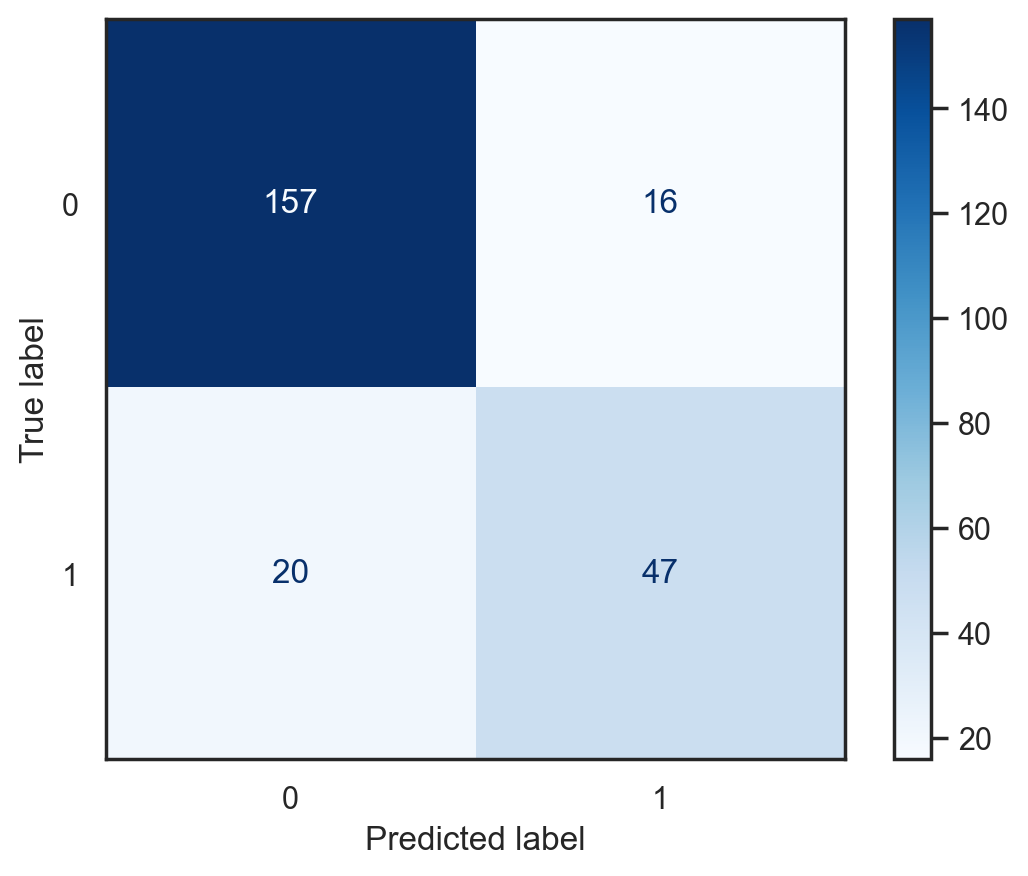

In [19]:
# Plot confusion matrix for the SGD classifier

plot_conf_mat(sgd_model, x_train, y_train)

### Precision, recall and ROC curve

In [20]:
# Compute precision, recall and f1-score for the SGD classifier

print(classification_report(y_train, sgd_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       173
           1       0.75      0.70      0.72        67

    accuracy                           0.85       240
   macro avg       0.82      0.80      0.81       240
weighted avg       0.85      0.85      0.85       240



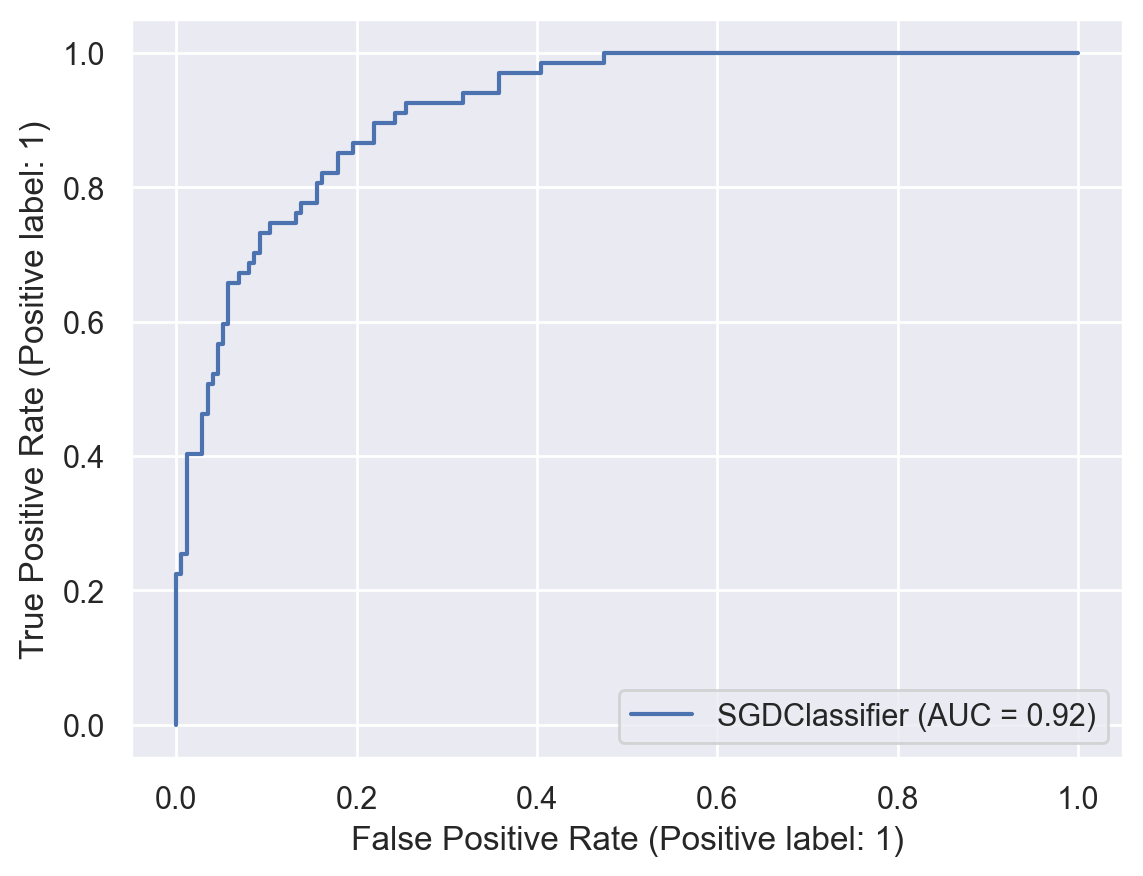

In [21]:
# Plot ROC curve for the SGD classifier

sgd_disp = RocCurveDisplay.from_estimator(sgd_model, x_train, y_train)
plt.show()

## Performance assessment

### Computing metrics on test data

In [22]:
# Apply preprocessing operations to test inputs
# Calling transform() and not fit_transform() uses preprocessing values computed on training set
x_test = full_pipeline.transform(df_x_test)

# Transform the targets DataFrame into a plain tensor
y_test = df_y_test.to_numpy()

print(f"x_test: {x_train.shape}. y_test: {y_test.shape}")

x_test: (240, 15). y_test: (61,)


In [23]:
# Compute precision, recall and f1-score for the SGD classifier

print(classification_report(y_test, sgd_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        45
           1       0.57      0.50      0.53        16

    accuracy                           0.77        61
   macro avg       0.70      0.68      0.69        61
weighted avg       0.76      0.77      0.77        61



### Results interpretation

Since the dataset is skewed (less positive than negative targets), accuracy is not sufficient to assess model performance.

Results might vary quite a lot from training to training. This is probably due to the small number of samples and the stochastic nature of gradient descent.

Generally speaking, the model does fairly well but the recall for true targets (patients with heart disease) might not be very good. Since this is the most important metric here (false negative could turn deadly), caution should be exercised before putting the trained classifier into production.

In any case, further tests should be run to evaluate other model architectures (decision trees, artificial neural networks, etc) on this task.